In [2]:
from sklearn.datasets import make_blobs
import numpy as np
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [4]:
from sklearn.cluster import KMeans
k=5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit(X)
print(kmeans.labels_)

[4 1 0 ... 3 0 1]


In [5]:
X_new = np.array([[0,2], [3,2], [-3,3],[-3,2.5]])

In [6]:
kmeans.predict(X_new)

array([0, 0, 3, 3], dtype=int32)

In [7]:
# this gives distance to new centriod.
# it can be used as a dimensionallity technique
kmeans.transform(X_new)

array([[0.32995317, 2.81093633, 1.49439034, 2.9042344 , 2.88633901],
       [2.80290755, 5.80730058, 4.4759332 , 5.84739223, 5.84236351],
       [3.29399768, 1.21475352, 1.69136631, 0.29040966, 1.71086031],
       [3.21806371, 0.72581411, 1.54808703, 0.36159148, 1.21567622]])

In [8]:
# setting up the centriods
good_init = np.array([[-3,3],[-3,2],[-3,1],[-1,2], [0,2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1)

In [9]:
kmeans.transform(X_new)

array([[2.90252066, 2.81093633, 2.88633901, 1.48858201, 0.33143587],
       [5.84579722, 5.80730058, 5.84236351, 4.46986157, 2.79863242],
       [0.29226049, 1.21475352, 1.71086031, 1.69642736, 3.29838701],
       [0.36147155, 0.72581411, 1.21567622, 1.55401997, 3.2223216 ]])

In [10]:
kmeans.inertia_

211.62337889822365

In [12]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)
minibatch_kmeans.transform(X_new)

array([[2.82051219, 0.35589803, 1.51942983, 2.88716439, 2.89049787],
       [5.81671239, 2.78107244, 4.5015984 , 5.82939146, 5.84650015],
       [1.21817913, 3.31349864, 1.66871447, 0.3020622 , 1.71131482],
       [0.72814676, 3.24023426, 1.52275308, 0.37474869, 1.21593385]])

In [13]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

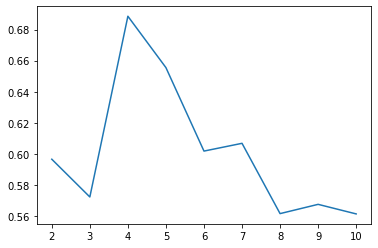

In [15]:
import matplotlib.pyplot as plt
scores = []
k_list = range(2,11)
for k in k_list:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    scores.append(silhouette_score(X,kmeans.labels_))
plt.plot(k_list,scores)

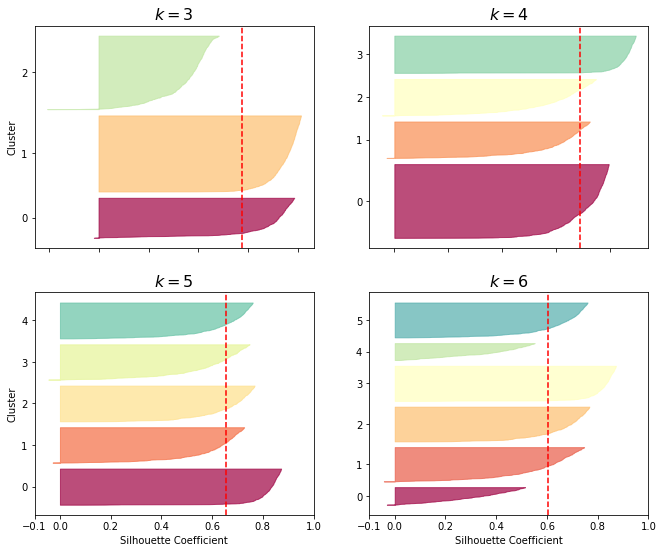

In [18]:
# make silhouette diagram
# code addapted from https://github.com/ageron/handson-ml2/blob/master/09_unsupervised_learning.ipynb
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    y_pred = kmeans.labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_score(X,kmeans.labels_), color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()


In [30]:
from matplotlib.image import imread
image = imread('ladybug.png')
image.shape
X = image.reshape(-1,3)

k=2


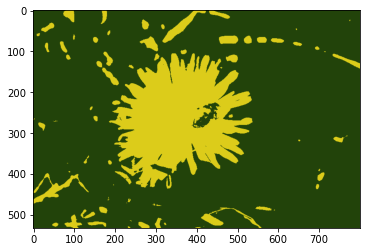

k=3


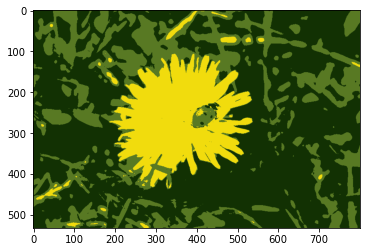

k=4


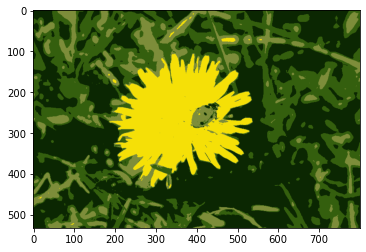

k=5


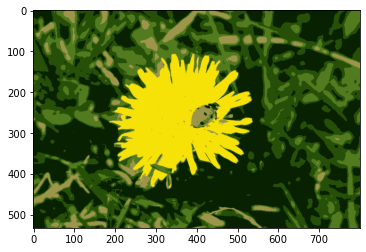

k=6


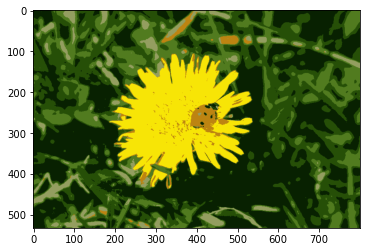

k=7


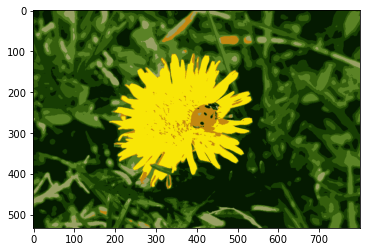

k=8


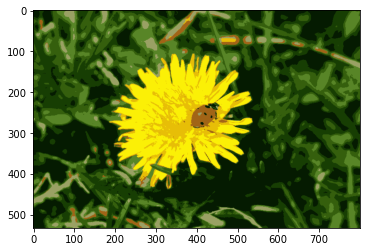

k=9


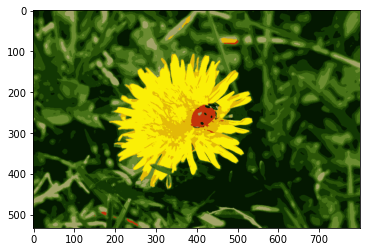

k=10


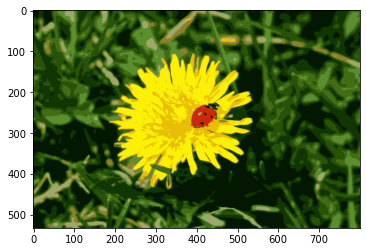

k=11


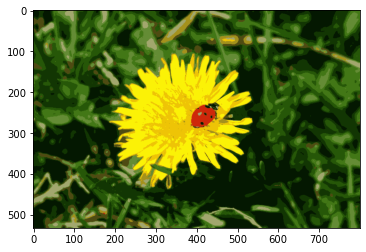

k=12


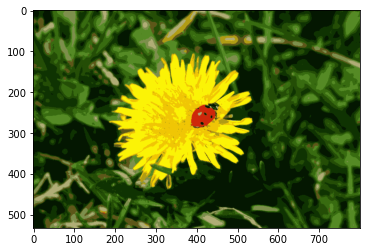

k=13


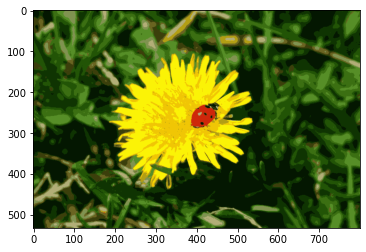

k=14


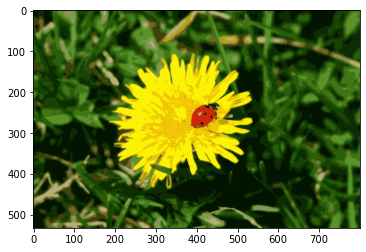

In [76]:
# this is taking each pixle as a training instance
# the color is then set to the average color for that 'cluster'
for k in range(2,15,1):
    print('k={}'.format(k))
    kmeans = KMeans(n_clusters=k).fit(X)
    segmented_imag = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imag = segmented_imag.reshape(image.shape)
    plt.imshow(segmented_imag)
    plt.show()

In [34]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y = True)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [37]:
# train basic linear reg on digits dataset
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [38]:
# baseline of 95.7%
log_reg.score(X_test, y_test)

0.9577777777777777

In [43]:
# use kmeans to preprocess reducing the dimensionallity
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters = 50)),
    ('log_reg', LogisticRegression(max_iter=100000)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression(max_iter=100000))])

In [41]:
pipeline.score(X_test, y_test)

0.9644444444444444

In [46]:
# now use grid search to find the best number of clusters
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(2,101,2))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2, n_jobs=-1)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  3.4min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=100000))]),
             n_jobs=-1, param_grid={'kmeans__n_clusters': range(2, 101, 2)},
             verbose=2)

In [47]:
grid_clf.best_params_

{'kmeans__n_clusters': 62}

In [48]:
grid_clf.score(X_test, y_test)

0.9755555555555555

In [53]:
n_labeled = 50
log_reg = LogisticRegression(max_iter=100000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test,y_test)

0.8333333333333334

In [54]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
represenative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_represenative_digits = X_train[represenative_digit_idx]

6


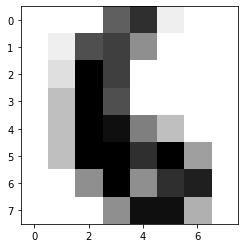

2


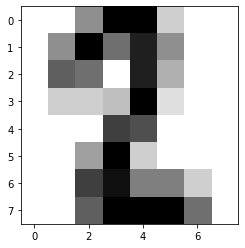

9


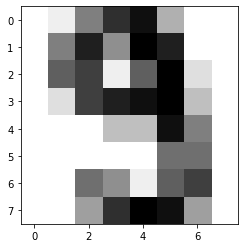

1


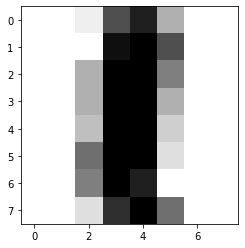

5


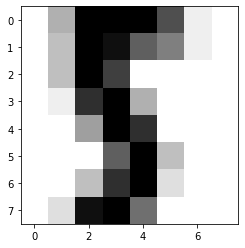

7


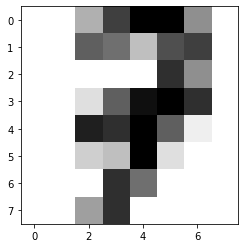

4


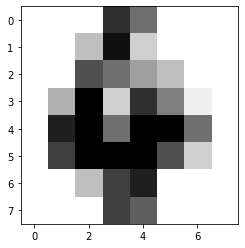

3


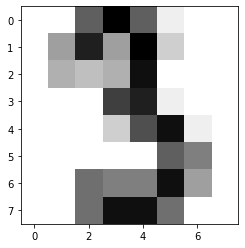

2


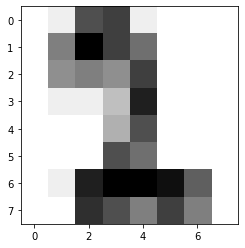

0


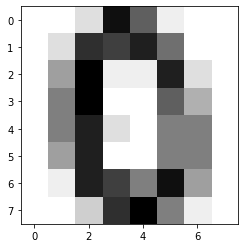

4


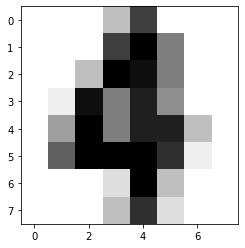

6


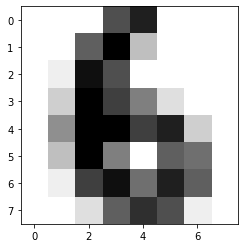

5


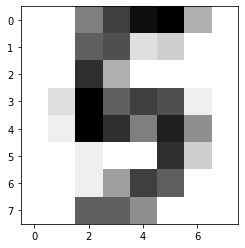

7


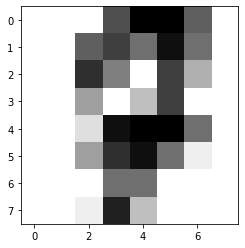

3


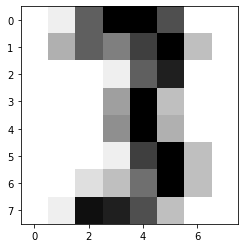

3


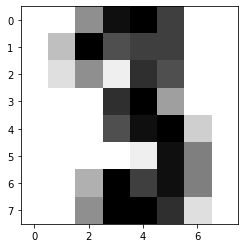

9


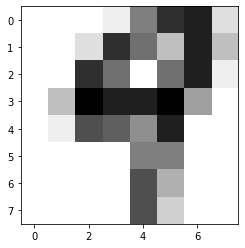

4


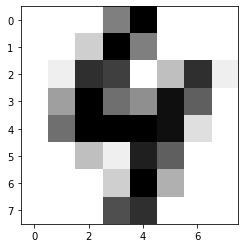

1


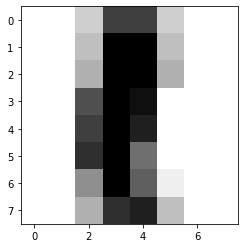

0


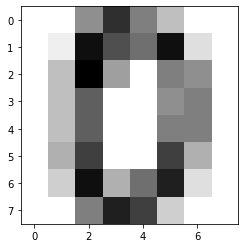

4


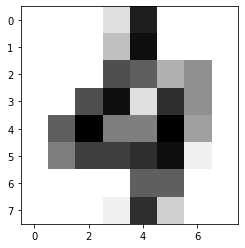

7


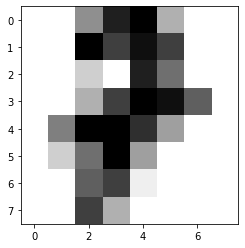

1


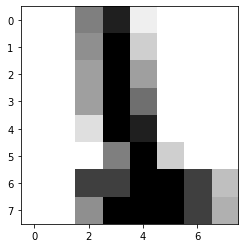

1


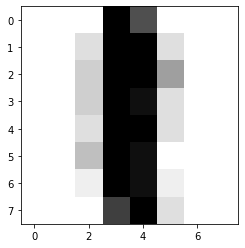

9


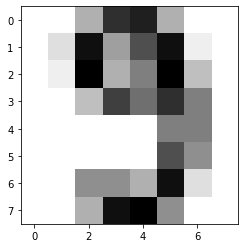

5


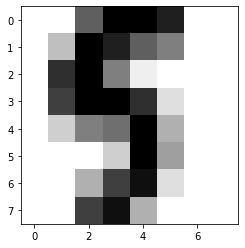

2


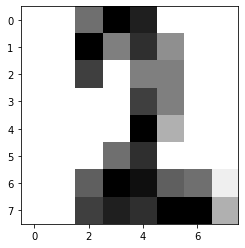

8


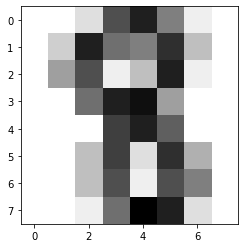

0


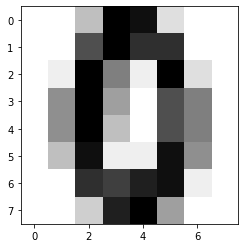

8


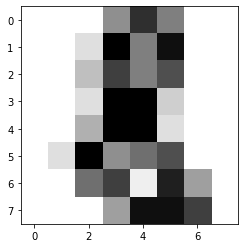

1


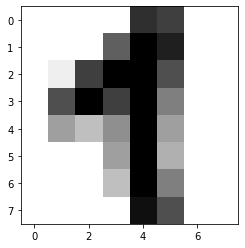

7


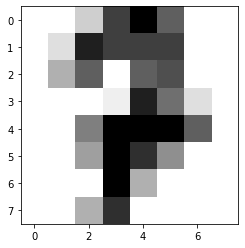

8


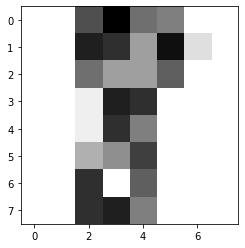

8


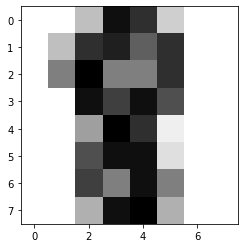

9


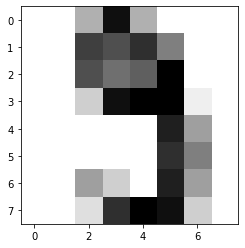

4


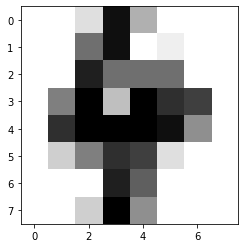

5


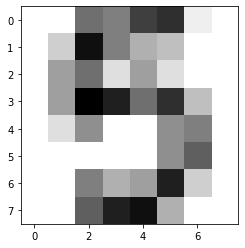

9


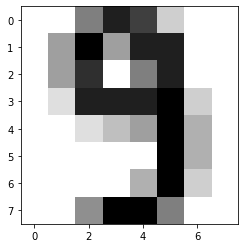

1


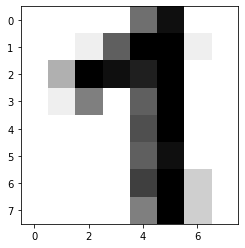

6


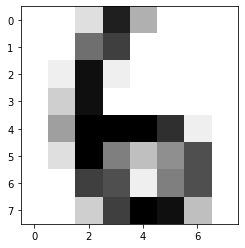

6


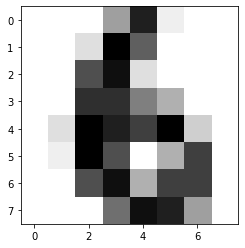

8


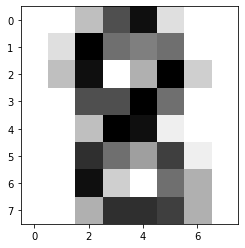

3


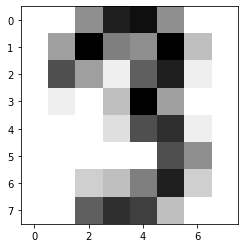

8


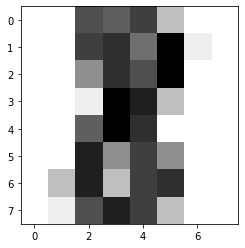

2


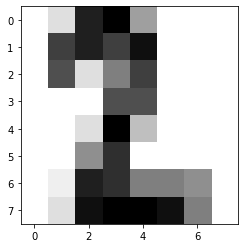

5


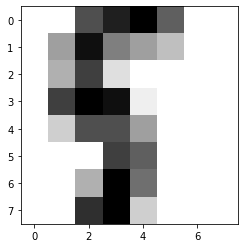

4


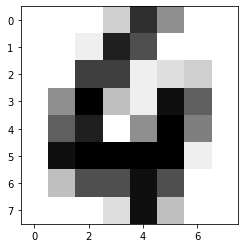

5


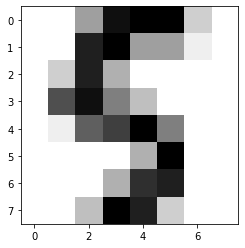

1


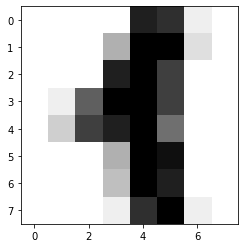

2


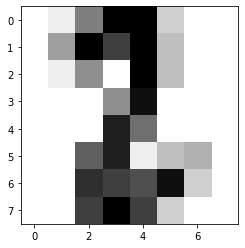

In [61]:
for digit, label in zip(X_represenative_digits, y_train[represenative_digit_idx]):
    print(label)
    digit.shape = [8,8]
    plt.imshow(digit,cmap='binary')
    plt.show()

In [62]:
# label the represenative digits by hand (saves lots of time and energy when propagated)
y_representative_digits = y_train[represenative_digit_idx]

In [63]:
log_reg = LogisticRegression(max_iter=100000)
log_reg.fit(X_represenative_digits, y_representative_digits)
log_reg.score(X_test,y_test)

0.9111111111111111

In [64]:
# loop over all clusters and apply the represenative data
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
log_reg = LogisticRegression(max_iter=100000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.92

In [74]:
# now only use the closest 20% of data to avoid miss labels
percentile_closest = 20
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]
log_reg = LogisticRegression(max_iter=100000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9222222222222223

In [75]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

1.0